In [ ]:
pip install rasterio

In [21]:
#PAQUETES A IMPORTAR (INSTALAR RASTERIO - pip install rasterio)
import rasterio
from rasterio import mask
import geopandas
from rasterio.plot import show, adjust_band
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [22]:
#CONECTAR CON DRIVE, SE DEBE DAR AUTORIZACIÓN
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#ASIGNAR LA IMAGEN EN UNA VARIABLE
IMAGEN = '/content/drive/MyDrive/IMAGE/CAMPAMENTO.tif'

In [24]:
#ASIGNAR EL SHAPEFILE EN UNA VARIABLE
CORTE = '/content/drive/MyDrive/IMAGE/CUT.shp'

In [25]:
#ABRIR IMAGEN
imagen_full = rasterio.open(IMAGEN)

In [26]:
##ABRIR SHAPEFILE
mascara_shp = geopandas.read_file(CORTE)

In [27]:
#VERIFICAR LA PROYECCIÓN DE LA IMAGEN Y EL SHAPEFILE
print(mascara_shp.crs)
print(imagen_full.crs)

EPSG:4326
EPSG:32617


In [28]:
#COMO LA PROYECCIÓN DEL SHAPEFILE ERA DIFERENTE, LO REPROYECTAMOS AL DE LA IMAGEN
dataShp = mascara_shp.to_crs(crs=imagen_full.crs)

In [29]:
#VERIFICAR NUEVAMENTE LAS PROYECCIONES, AHORA SI SON IGUALES
print(dataShp.crs)
print(imagen_full.crs)

PROJCS["WGS 84 / UTM zone 17N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32617"]]
EPSG:32617


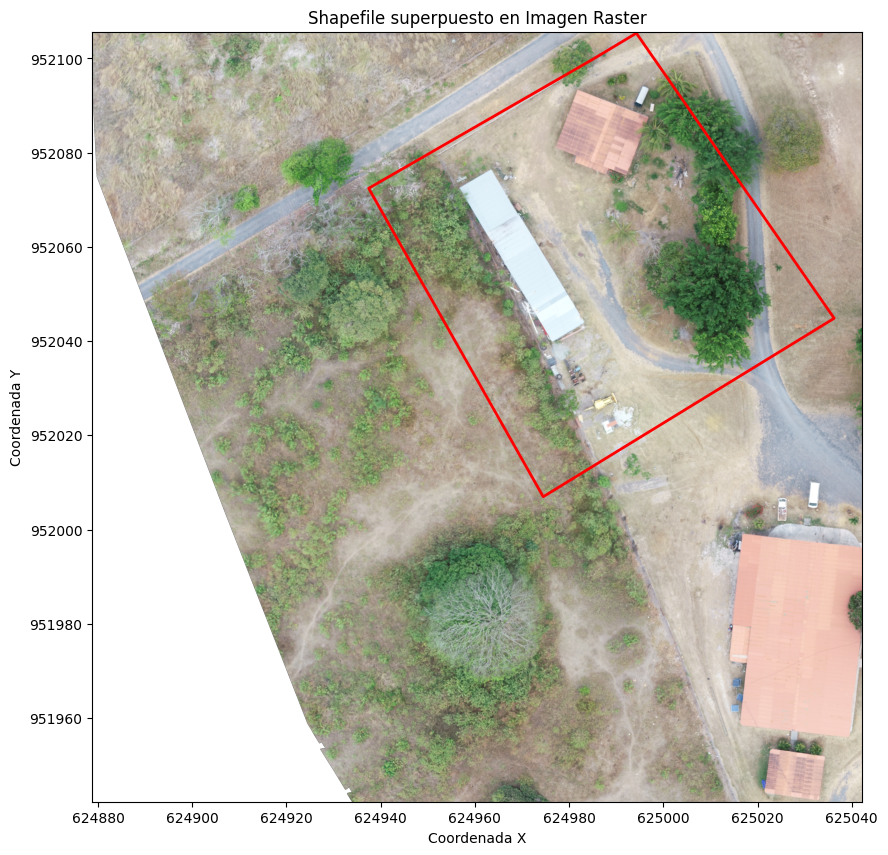

In [30]:
#ABRIR LA IMAGEN CON EL SHAPEFILE SUPERPUESTA PARA LUEGO CORTAR (ESTO COMO PASA DE VERIFICACIÓN)
with rasterio.open(IMAGEN) as src:
    # Leer todas las bandas de la imagen
    imagen_array_bgr = src.read()
    # Transponer para Matplotlib (altura, ancho, bandas)
    imagen_array_rgb = np.transpose(imagen_array_bgr, (1, 2, 0))

    # Obtener la extensión geográfica de la imagen
    # Esto es crucial para que el shapefile se superponga correctamente
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

    # --- Cargar el shapefile ---
    gdf = dataShp

    # --- Visualizar la imagen y el shapefile ---
    fig, ax = plt.subplots(figsize=(10, 10))

    # Mostrar la imagen ráster
    # Usamos el 'extent' de la imagen para posicionarla correctamente en el gráfico
    ax.imshow(imagen_array_rgb, extent=extent)

    # Mostrar el shapefile sobre la imagen
    # 'facecolor' lo hace transparente, 'edgecolor' define el borde del polígono/línea
    gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

    ax.set_title("Shapefile superpuesto en Imagen Raster")
    ax.set_xlabel("Coordenada X")
    ax.set_ylabel("Coordenada Y")
    plt.show()


In [31]:
#SE REALIZA EL CORTE DE LA IMAGEN
aoi = dataShp["geometry"]
image_aoi , image_aoi_transform = rasterio.mask.mask(imagen_full , aoi,
crop=True)

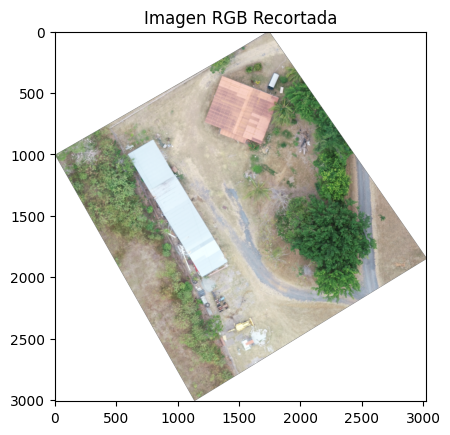

In [32]:
#ABRIMOS LA IMAGEN QUE HA SIDO CORTADA EN RGB
imagen_array_rgb = np.transpose(image_aoi, (1, 2, 0))

plt.imshow(imagen_array_rgb)
plt.title("Imagen RGB Recortada")
plt.show()


